In [1]:
import bagpy
import openpyxl
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
#For stationary data taken in open source
data_set = bagreader('/home/shreejit/Desktop/eece5554/LAB2/src/gps_rtk_driver/analysis/data/good_data_stationary.bag')

data_set.topic_table

gps_good_stat_topic = data_set.message_by_topic(topic = '/gps')
gps_a_df = pd.read_csv(gps_good_stat_topic)

[INFO]  Data folder /home/shreejit/Desktop/eece5554/LAB2/src/gps_rtk_driver/analysis/data/good_data_stationary already exists. Not creating.


In [30]:
# Converting data to numpy arrays for simplicity
time_array = gps_a_df['Time'].to_numpy()
lat_array = gps_a_df['Latitude'].to_numpy()
long_array = gps_a_df['Longitude'].to_numpy()
altitude_array = gps_a_df['Altitude'].to_numpy()
easting_array = gps_a_df['UTM_easting'].to_numpy()
northing_array = gps_a_df['UTM_northing'].to_numpy()
quality_array = gps_a_df['Quality'].to_numpy()

#Normalizing all values
lat_array = lat_array - np.min(lat_array)
long_array = long_array - np.min(long_array)
altitude_array = altitude_array - np.min(altitude_array)
easting_array = easting_array - np.min(easting_array)
northing_array = northing_array - np.min(northing_array)
time_array = np.around(time_array - 1.66553031e+09 + 1.29205227e-01)  #converting timestamp to start-time



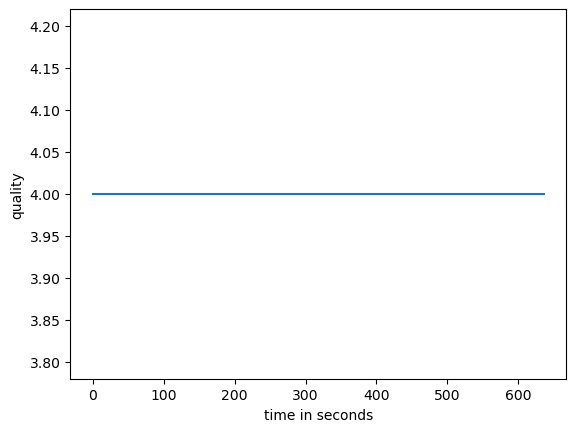

In [32]:
#2-Dimensional plot for stationary

fig1, ax = plt.subplots()

#Setting labels
ax.set_xlabel('time in seconds')
ax.set_ylabel('quality')

#Setting mean lines
# plt.axhline(y=48.775367, color='r', linestyle='-', label='mean')

#plots
# ax.plot(northing_array,easting_array)
# ax.plot(time_array,easting_array)
# ax.scatter(northing_array,easting_array)
# ax.plot(time_array,altitude_array)
ax.plot(time_array,quality_array)
#histograms for error distrbution
# ax.hist(easting_array, 2)
# ax.legend(loc=7)

In [28]:
#Statistical summary
gps_a_df.agg(

    {

        "Latitude": ["mean", "skew", "std", "max", "min"],

        "Longitude": ["mean", "skew", "std", "max", "min"],
        
        "UTM_northing": ["mean", "skew", "std", "max", "min"],

        "UTM_easting": ["mean", "skew", "std", "max", "min"],
        
        "Altitude": ["mean", "skew", "std", "max", "min"],

    }

)

# np.mean(easting_array)
np.max(easting_array)-np.min(easting_array)

0.03125

In [77]:
#for moving data taken in open source
data_set = bagreader('/home/shreejit/Desktop/eece5554/LAB2/src/gps_rtk_driver/analysis/data/good_data_moving.bag')

data_set.topic_table
gps_good_moving_topic = data_set.message_by_topic(topic = '/gps')
gps_b_df = pd.read_csv(gps_good_moving_topic)
gps_b_df = gps_b_df[10:]

[INFO]  Data folder /home/shreejit/Desktop/eece5554/LAB2/src/data/good_data_moving already exists. Not creating.


In [78]:
# Converting data to numpy arrays for simplicity
time_array = gps_b_df['Time'].to_numpy()
lat_array = gps_b_df['Latitude'].to_numpy()
long_array = gps_b_df['Longitude'].to_numpy()
altitude_array = gps_b_df['Altitude'].to_numpy()
easting_array = gps_b_df['UTM_easting'].to_numpy()
northing_array = gps_b_df['UTM_northing'].to_numpy()

#Normalizing all values
lat_array = lat_array - np.min(lat_array)
long_array = long_array - np.min(long_array)
altitude_array = altitude_array - np.min(altitude_array)
easting_array = easting_array - np.min(easting_array)
northing_array = northing_array - np.min(northing_array)
time_array = np.around(time_array - 1.66553031e+09 + 1.29205227e-01 - 806)  #converting timestamp to start-time

#Create new pandas with normalized values
# d2 = {'Time': time_array, 'Easting': easting_array, 'Northing': northing_array}
# df2 = pd.DataFrame(d2)
# df2.to_excel('Stationary_data_excel.xlsx')

0.36077082481475087

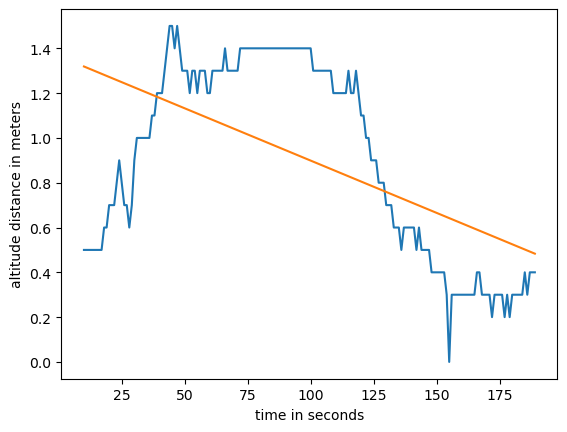

In [83]:
#2-Dimensional plot for stationary

fig1, ax = plt.subplots()

#Setting labels
# ax.set_xlabel('time in dec-secs')
ax.set_ylabel('altitude distance in meters')
ax.set_xlabel('time in seconds')

#Setting mean lines
# plt.axhline(y=48.775367, color='r', linestyle='-', label='mean')

#plots
# ax.plot(time_array,northing_array)
# ax.plot(time_array,easting_array)
ax.plot(time_array,altitude_array)
# ax.plot(time_array,altitude_array)

#histograms for error distrbution
# ax.hist(Northing_error, 10)
# ax.legend(loc=7)

#polyfit for altitude line
bx , by = np.polyfit(time_array,altitude_array,1)
ax.plot(time_array, bx*time_array+by)

MSE1 = np.square(np.subtract(altitude_array,bx*time_array+by)).mean()
RMSE1 = math.sqrt(MSE1)
RMSE1

#Creating bags for 4 lines -
#(0 to 52) for first slope ; (57 to 82) for second slope ; (85 to 141) for third slope ; (144 to 166) for forth line
# p1 = np.polyfit(northing_array[:52],easting_array[:52],1)
# a1 , b1 = p1
# ax.plot(northing_array[:52], a1*northing_array[:52]+b1, label = 'slope1')

# p2 = np.polyfit(northing_array[57:82],easting_array[57:82],1)
# a2 , b2 = p2
# ax.plot(northing_array[57:82], a2*northing_array[57:82]+b2, label = 'slope2')

# p3 = np.polyfit(northing_array[85:141],easting_array[85:141],1)
# a3, b3 = p3
# ax.plot(northing_array[85:141], a3*northing_array[85:141]+b3, label = 'slope3')

# p4 = np.polyfit(northing_array[144:166],easting_array[144:166],1)
# a4, b4 = p4
# ax.plot(northing_array[144:166], a4*northing_array[144:166]+b4, label = 'slope4')

# ax.legend()

In [35]:
#Finding RMSE for each slope and sample -
MSE1 = np.square(np.subtract(easting_array[:52],a1*northing_array[:52]+b1)).mean()
RMSE1 = math.sqrt(MSE1)
RMSE1

0.2286351291037935

In [36]:
MSE2 = np.square(np.subtract(easting_array[57:82],a2*northing_array[57:82]+b2)).mean()
RMSE2 = math.sqrt(MSE2)
RMSE2

0.17844762238090395

In [37]:
MSE3 = np.square(np.subtract(easting_array[85:141],a3*northing_array[85:141]+b3)).mean()
RMSE3 = math.sqrt(MSE3)
RMSE3

0.2102266112869591

In [38]:
MSE4 = np.square(np.subtract(easting_array[144:166],a4*northing_array[144:166]+b4)).mean()
RMSE4 = math.sqrt(MSE4)
RMSE4

0.16092058314725383

In [39]:
mean_RMSE = (RMSE1+RMSE2+RMSE3+RMSE4)/4

mean_RMSE

0.1945574864797276

In [33]:
#for stationary data taken infront of ISEC
data_set = bagreader('/home/shreejit/Desktop/eece5554/LAB2/src/gps_rtk_driver/analysis/data/bad_data_stationary.bag')

data_set.topic_table
gps_good_moving_topic = data_set.message_by_topic(topic = '/gps')
gps_b_df = pd.read_csv(gps_good_moving_topic)

[INFO]  Data folder /home/shreejit/Desktop/eece5554/LAB2/src/data/bad_data_stationary already exists. Not creating.


In [34]:
# Converting data to numpy arrays for simplicity
time_array = gps_b_df['Time'].to_numpy()
lat_array = gps_b_df['Latitude'].to_numpy()
long_array = gps_b_df['Longitude'].to_numpy()
altitude_array = gps_b_df['Altitude'].to_numpy()
easting_array = gps_b_df['UTM_easting'].to_numpy()
northing_array = gps_b_df['UTM_northing'].to_numpy()
quality_array = gps_b_df['Quality'].to_numpy()

#Normalizing all values
lat_array = lat_array - np.min(lat_array)
long_array = long_array - np.min(long_array)
altitude_array = altitude_array - np.min(altitude_array)
easting_array = easting_array - np.min(easting_array)
northing_array = northing_array - np.min(northing_array)
time_array = np.around(time_array - 1.66553031e+09 + 1.29205227e-01 - 806)  #converting timestamp to start-time

(array([  1., 164., 274., 210.]),
 array([0.       , 0.0234375, 0.046875 , 0.0703125, 0.09375  ]),
 <a list of 4 Patch objects>)

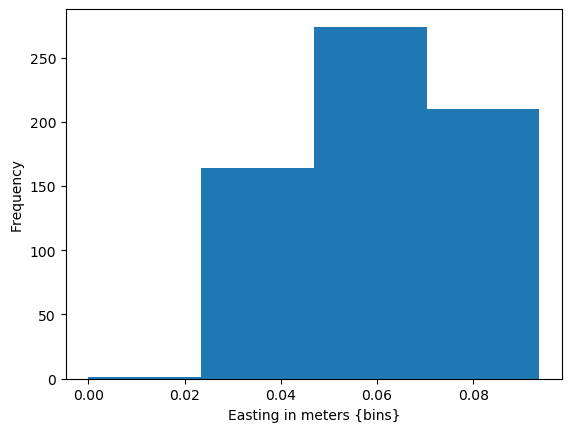

In [35]:
#2-Dimensional plot for stationary

fig1, ax = plt.subplots()

#Setting labels
# ax.set_xlabel('time in dec-secs')
ax.set_ylabel('Frequency')
ax.set_xlabel('Easting in meters {bins}')

#Setting mean lines
# plt.axhline(y=48.775367, color='r', linestyle='-', label='mean')

#plots
# ax.plot(time_array,northing_array)
# ax.plot(time_array,quality_array)
# ax.scatter(northing_array,easting_array)
# ax.plot(time_array,altitude_array)
#histograms for error distrbution
ax.hist(easting_array, 4)
# ax.legend(loc=7)

In [39]:
#Statistical summary
gps_b_df.agg(

    {

        "Latitude": ["mean", "skew", "std", "max", "min"],

        "Longitude": ["mean", "skew", "std", "max", "min"],
        
        "UTM_northing": ["mean", "skew", "std", "max", "min"],

        "UTM_easting": ["mean", "skew", "std", "max", "min"],
        
        "Altitude": ["mean", "skew", "std", "max", "min"],

    }

)

# np.mean(easting_array)
# np.mean(altitude_array)
np.max(easting_array)-np.min(easting_array)

0.09375

In [3]:
#for moving data taken infront of ISEC
data_set = bagreader('/home/shreejit/Desktop/eece5554/LAB2/src/gps_rtk_driver/analysis/data/bad_moving_data3.bag.active')

data_set.topic_table
gps_good_moving_topic = data_set.message_by_topic(topic = '/gps')
gps_b2_df = pd.read_csv(gps_good_moving_topic)
gps_b_df = gps_b2_df[26:]

[INFO]  Data folder /home/shreejit/Desktop/eece5554/LAB2/src/gps_rtk_driver/analysis/data/bad_moving_data3.bag.ac already exists. Not creating.


In [86]:
# Converting data to numpy arrays for simplicity
time_array = gps_b_df['Time'].to_numpy()
lat_array = gps_b_df['Latitude'].to_numpy()
long_array = gps_b_df['Longitude'].to_numpy()
altitude_array = gps_b_df['Altitude'].to_numpy()
easting_array = gps_b_df['UTM_easting'].to_numpy()
northing_array = gps_b_df['UTM_northing'].to_numpy()
quality_array = gps_b_df['Quality'].to_numpy()

#Normalizing all values
lat_array = lat_array - np.min(lat_array)
long_array = long_array - np.min(long_array)
altitude_array = altitude_array - np.min(altitude_array)
easting_array = easting_array - np.min(easting_array)
northing_array = northing_array - np.min(northing_array)
time_array = np.around(time_array - 1.66602662e+09 - 3 - 26)  #converting timestamp to start-time

d3 = {'Time': time_array, 'Easting': easting_array, 'Northing': northing_array}
df3 = pd.DataFrame(d3)
df3.to_excel('MDB_excel.xlsx')

1.2162707549717007

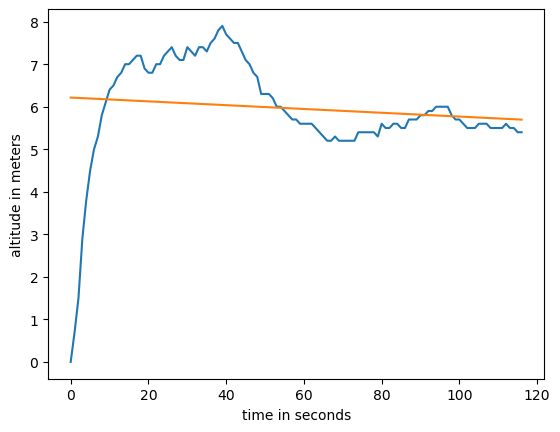

In [87]:
#2-Dimensional plot for stationary

fig1, ax = plt.subplots()

#Setting labels
# ax.set_xlabel('time in secs')
ax.set_ylabel('altitude in meters')
ax.set_xlabel('time in seconds')
# ax.set_ylabel('quality factor unit')

#Setting mean lines
# plt.axhline(y=48.775367, color='r', linestyle='-', label='mean')

#plots
# ax.plot(time_array,northing_array)
# ax.plot(time_array,easting_array)
ax.plot(time_array,altitude_array)
# ax.plot(time_array,altitude_array)

#polyfit for altitude line
bx , by = np.polyfit(time_array,altitude_array,1)
ax.plot(time_array, bx*time_array+by)

MSE1 = np.square(np.subtract(altitude_array,bx*time_array+by)).mean()
RMSE1 = math.sqrt(MSE1)
RMSE1


#plot of quality v/s time
# ax.plot(time_array,quality_array)
#histograms for error distrbution
# ax.hist(Northing_error, 10)
# ax.legend(loc=7)

#Creating bags for 4 lines -
#(0 to 24) for first slope ; (26 to 57) for second slope ; (58 to 82) for third slope ; (83 to 116) for forth line
# p1 = np.polyfit(northing_array[:24],easting_array[:24],1)
# a1 , b1 = p1
# ax.plot(northing_array[:24], a1*northing_array[:24]+b1, label = 'slope1')

# p2 = np.polyfit(northing_array[26:57],easting_array[26:57],1)
# a2 , b2 = p2
# ax.plot(northing_array[26:57], a2*northing_array[26:57]+b2, label = 'slope2')

# p3 = np.polyfit(northing_array[58:82],easting_array[58:82],1)
# a3, b3 = p3
# ax.plot(northing_array[58:82], a3*northing_array[58:82]+b3, label = 'slope3')

# p4 = np.polyfit(northing_array[83:116],easting_array[83:116],1)
# a4, b4 = p4
# ax.plot(northing_array[83:116], a4*northing_array[83:116]+b4, label = 'slope4')

# ax.legend()

In [72]:
#Finding RMSE for each slope and sample -
MSE1 = np.square(np.subtract(easting_array[:24],a1*northing_array[:24]+b1)).mean()
RMSE1 = math.sqrt(MSE1)
RMSE1

0.460465086269652

In [73]:
MSE2 = np.square(np.subtract(easting_array[26:57],a2*northing_array[26:57]+b2)).mean()
RMSE2 = math.sqrt(MSE2)
RMSE2

0.8599529012455769

In [74]:
MSE3 = np.square(np.subtract(easting_array[58:82],a3*northing_array[58:82]+b3)).mean()
RMSE3 = math.sqrt(MSE3)
RMSE3

0.10662079847275881

In [75]:
MSE4 = np.square(np.subtract(easting_array[83:116],a4*northing_array[83:116]+b4)).mean()
RMSE4 = math.sqrt(MSE4)
RMSE4

0.2943241391851498

In [76]:
mean_RMSE = (RMSE1+RMSE2+RMSE3+RMSE4)/4
mean_RMSE

0.4303407312932844

In [ ]:
#Statistical summary
gps_b_df.agg(

    {

        "Latitude": ["mean", "skew", "std", "max", "min"],

        "Longitude": ["mean", "skew", "std", "max", "min"],
        
        "UTM_northing": ["mean", "skew", "std", "max", "min"],

        "UTM_easting": ["mean", "skew", "std", "max", "min"],
        
        "Altitude": ["mean", "skew", "std", "max", "min"],

    }

)